# Image Manipulation with NumPy and PIL

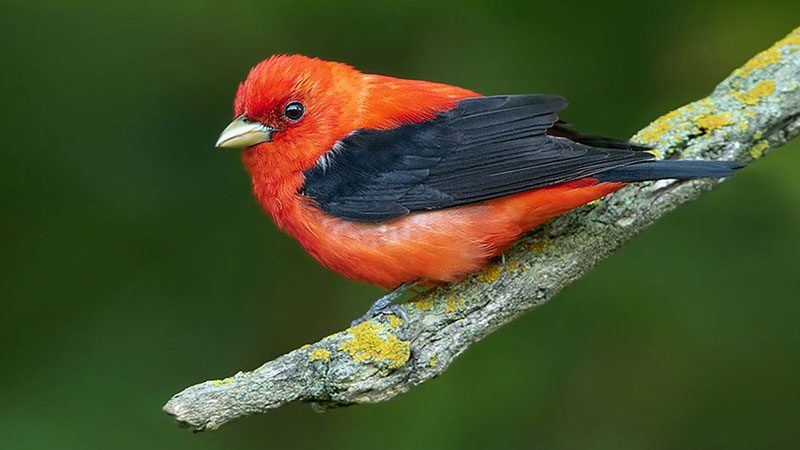

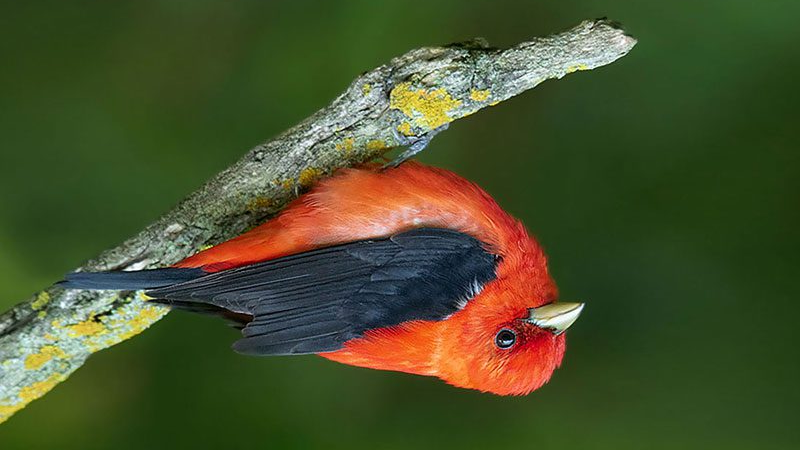

In [18]:
import numpy as np
from PIL import Image

with Image.open("images/Bird_picture.jpg") as img:
    display(img)
    img_arr = np.array(img)

def flip_image(image, flip, name):
    """This function flips an image in the direction specified by the flip parameter."""
    if flip == "Left to right":
        new_img = np.fliplr(image)
    elif flip == "Top to bottom":
        new_img = np.flipud(image)
    elif flip == "Both":
        new_img = np.flipud(np.fliplr(image))
    else:
        new_img = image
    new_img = Image.fromarray(new_img)
    new_img.save(f'images/{name}.jpg')
    display(new_img)

flip_image(img_arr, "Both", "Flipped")

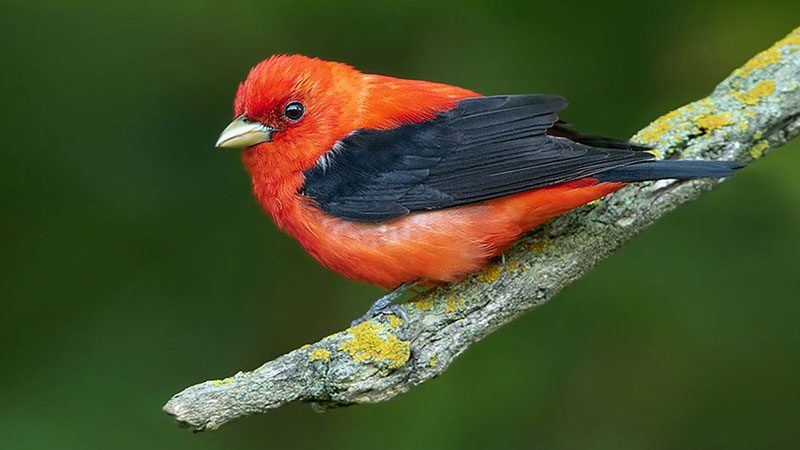

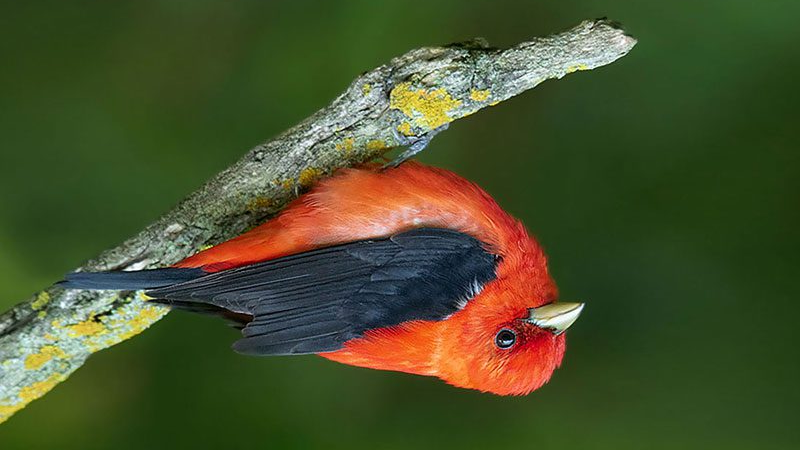

Image saved as images/Flipped.jpg


In [19]:
import numpy as np
from PIL import Image

# Load the image and convert it to a NumPy array
with Image.open("images/Bird_picture.jpg") as img:
    display(img)  # Display the original image
    img_arr = np.array(img)

def flip_image(image, flip, name):
    """
    This function flips an image in the direction specified by the flip parameter and saves the result.

    Parameters:
    - image: A NumPy array representing the image.
    - flip: A string specifying the flip direction. 
            Options: "Left to right", "Top to bottom", "Both".
    - name: The name of the output file (without extension).

    Saves the flipped image as a .jpg file in the 'images' folder and displays the result.
    """
    # Validate the flip parameter
    if flip not in ["Left to right", "Top to bottom", "Both"]:
        raise ValueError("Invalid flip direction. Choose from 'Left to right', 'Top to bottom', or 'Both'.")

    # Perform the flip
    if flip == "Left to right":
        new_img = np.fliplr(image)
    elif flip == "Top to bottom":
        new_img = np.flipud(image)
    elif flip == "Both":
        new_img = np.flipud(np.fliplr(image))
    else:
        new_img = image  # This case won't execute due to earlier validation

    # Dynamically determine the mode
    if len(image.shape) == 2:  # Grayscale image
        mode = 'L'
    elif len(image.shape) == 3 and image.shape[2] == 3:  # RGB image
        mode = 'RGB'
    elif len(image.shape) == 3 and image.shape[2] == 4:  # RGBA image
        mode = 'RGBA'
    else:
        raise ValueError("Unsupported image format. Image must be grayscale, RGB, or RGBA.")

    # Convert to a PIL image
    flipped_img = Image.fromarray(new_img, mode=mode)

    # Save the flipped image
    output_path = f'images/{name}.jpg'
    flipped_img.save(output_path)

    # Display the flipped image
    display(flipped_img)

    print(f"Image saved as {output_path}")

# Call the function with your example
flip_image(img_arr, "Both", "Flipped")


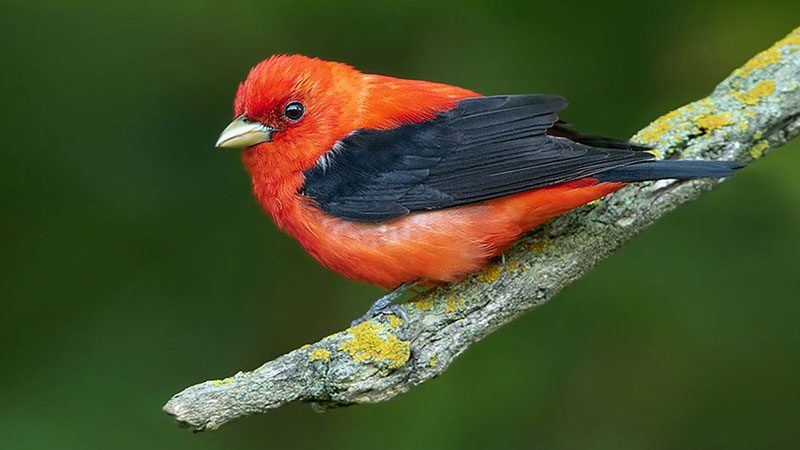

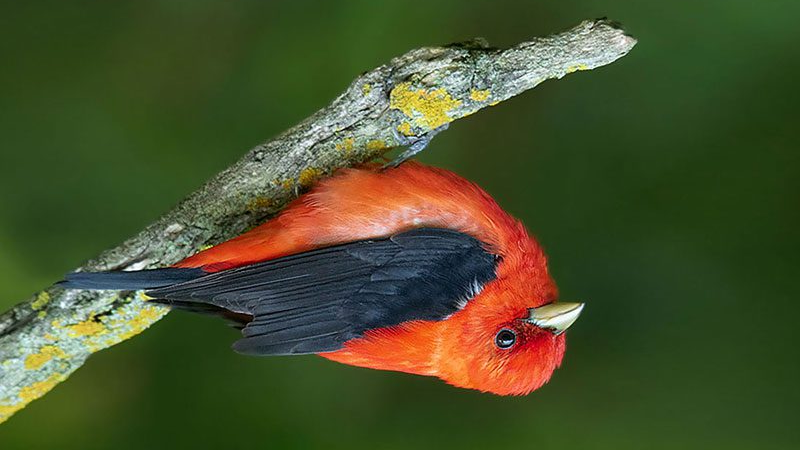

Image saved as images/Flipped.jpg


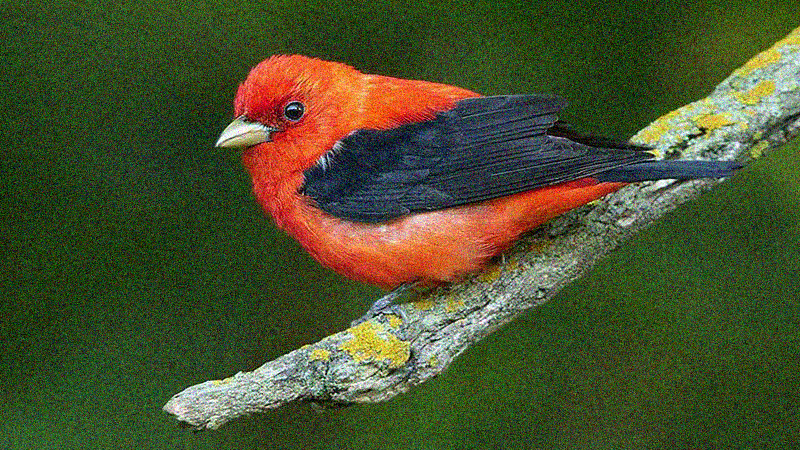

Image saved as images/Noisy.jpg


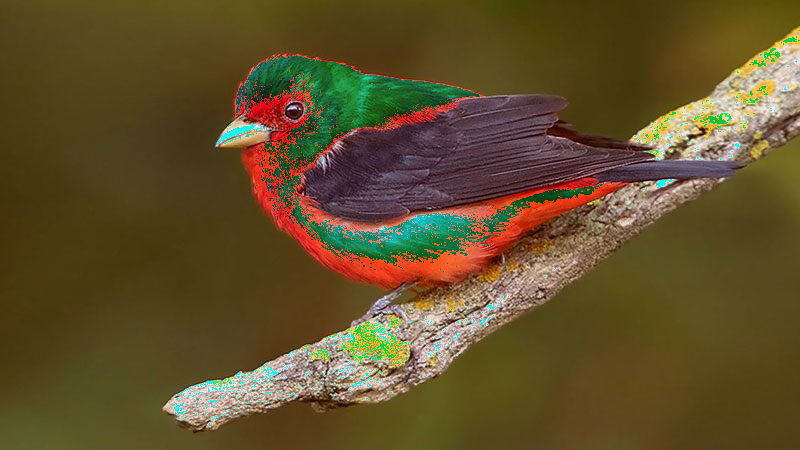

Image saved as images/Brightened_Red.jpg


In [20]:
import numpy as np
from PIL import Image

# Load the image and convert it to a NumPy array
with Image.open("images/Bird_picture.jpg") as img:
    display(img)  # Display the original image
    img_arr = np.array(img)

def flip_image(image, flip, name):
    """
    This function flips an image in the direction specified by the flip parameter and saves the result.
    """
    if flip not in ["Left to right", "Top to bottom", "Both"]:
        raise ValueError("Invalid flip direction. Choose from 'Left to right', 'Top to bottom', or 'Both'.")

    if flip == "Left to right":
        new_img = np.fliplr(image)
    elif flip == "Top to bottom":
        new_img = np.flipud(image)
    elif flip == "Both":
        new_img = np.flipud(np.fliplr(image))

    if len(image.shape) == 2:  # Grayscale
        mode = 'L'
    elif len(image.shape) == 3 and image.shape[2] == 3:  # RGB
        mode = 'RGB'
    elif len(image.shape) == 3 and image.shape[2] == 4:  # RGBA
        mode = 'RGBA'
    else:
        raise ValueError("Unsupported image format.")

    flipped_img = Image.fromarray(new_img, mode=mode)
    flipped_img.save(f'images/{name}.jpg')
    display(flipped_img)
    print(f"Image saved as images/{name}.jpg")

def add_random_noise(image, mean=0, std=25, name="Noisy"):
    """
    Adds random Gaussian noise to the image.
    """
    noise = np.random.normal(mean, std, image.shape).astype(np.int32)
    noisy_img = np.clip(image + noise, 0, 255).astype(np.uint8)

    noisy_img_pil = Image.fromarray(noisy_img)
    noisy_img_pil.save(f'images/{name}.jpg')
    display(noisy_img_pil)
    print(f"Image saved as images/{name}.jpg")

def brighten_channel(image, channel, value, name="Brightened"):
    """
    Brightens a specific channel in the image by a fixed value.
    """
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Brighten Channel only works for RGB images.")

    brightened_img = image.copy()
    brightened_img[:, :, channel] = np.clip(brightened_img[:, :, channel] + value, 0, 255)

    brightened_img_pil = Image.fromarray(brightened_img)
    brightened_img_pil.save(f'images/{name}.jpg')
    display(brightened_img_pil)
    print(f"Image saved as images/{name}.jpg")

# Example Usage
flip_image(img_arr, "Both", "Flipped")
add_random_noise(img_arr, mean=0, std=25, name="Noisy")
brighten_channel(img_arr, channel=0, value=40, name="Brightened_Red")
